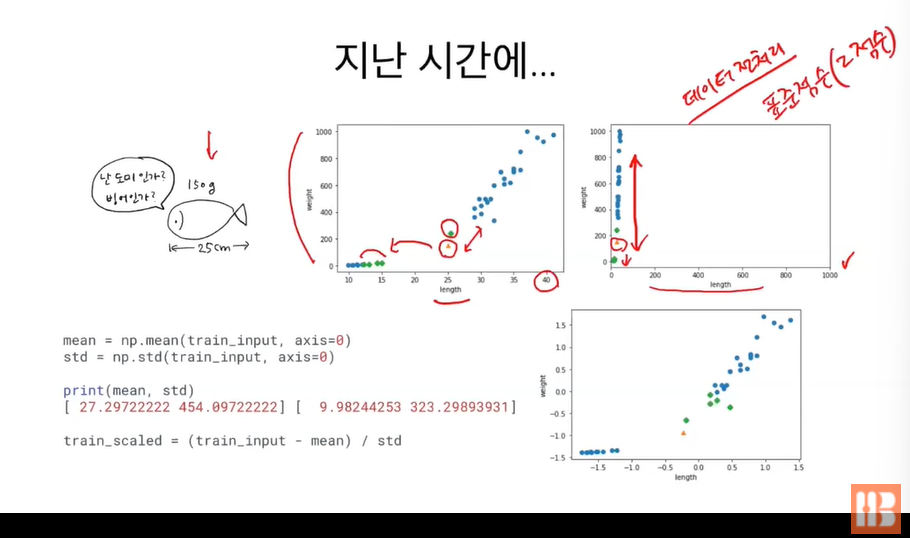 

- 데이터 전처리로 스케일링 하여 가장 가까운 것을 가져올 수 있도록 하였음

- 도미 데이터에 가장 가깝다고 판단하여 도미라 예측함

- k최근접 이웃

- 회귀 : regression 
- 분류 : 0,1로 준비하여 분류

- 회귀에서는 임의의 숫자(타깃, 예:무게)를 예측함

- 지도학습 : 분류, 회귀

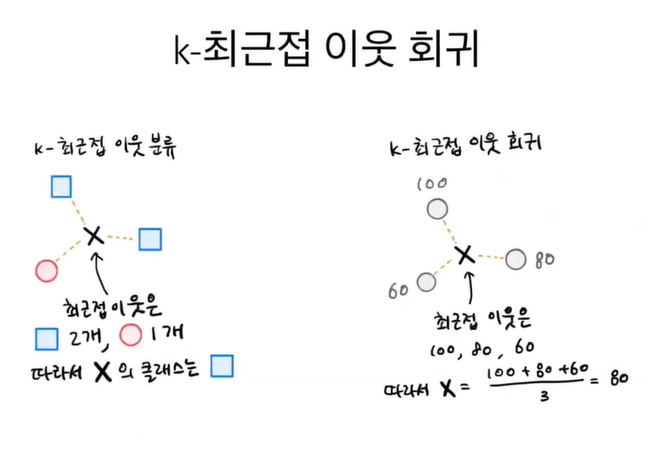

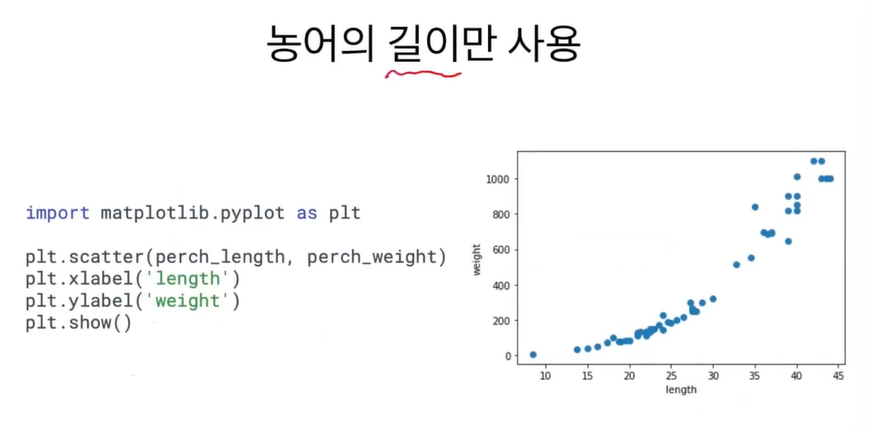

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

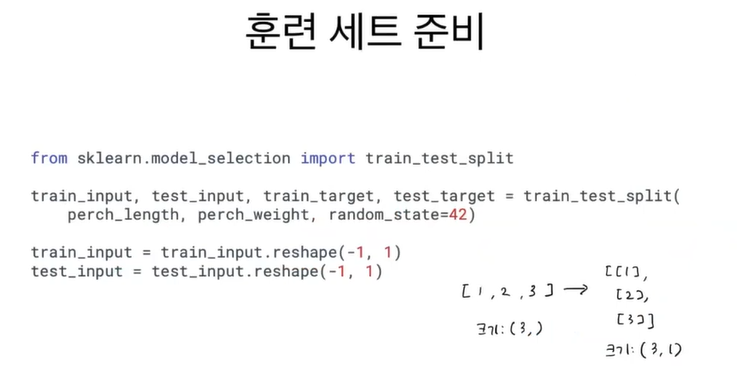

- stratify 사용안함 : target값을 넣지 않음. 회귀에서는 stratify 를 사용하지 않음
- reshape(-1,1), 열방향으로 만들어야 훈련 가능

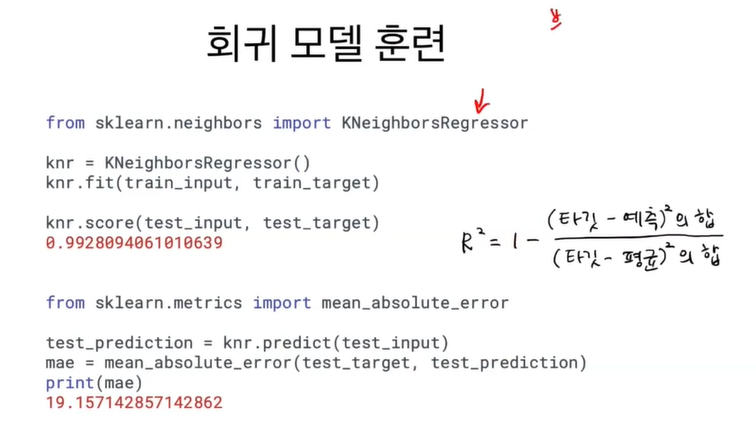

- R^2는 0에서 1까지의 값인데 1에 가까우면 타깃값에 예측값이 가까운거라 좋은 거임

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_data = [[l,w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14

In [2]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

- train과 test를 random하고 split함
- 이후 회귀 모델에 훈련시키고 score를 매김

In [3]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

knr.score(test_input, test_target)

1.0

In [4]:
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

0.0


- 차이의 평균값을 냄

- 과대적합, 과소적합

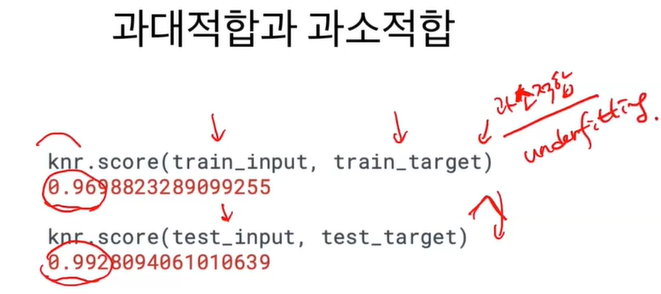

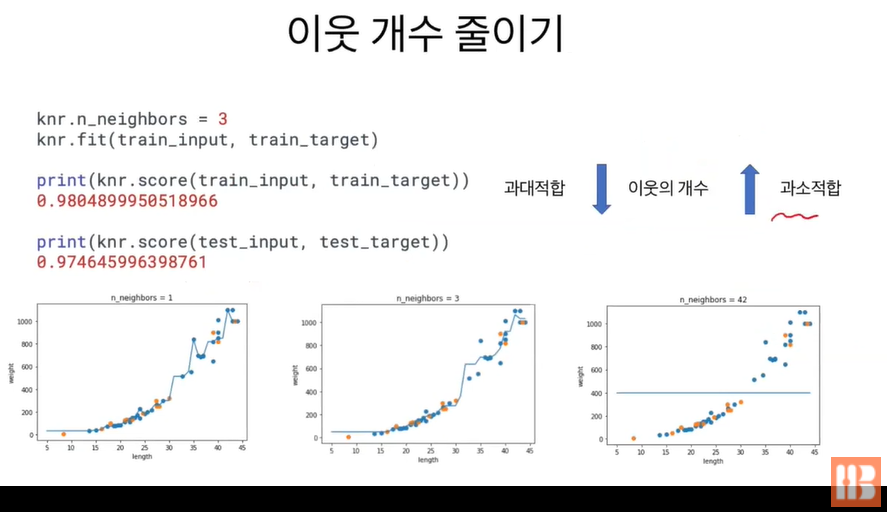

In [5]:
knr.n_neighbors = 3 
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

print(knr.score(test_input, test_target))

1.0
1.0
